In [1]:
%cd ../

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.htfa as HTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
lepping_db = niidb.FMriActivationsDb('data/sound_depression.db', mask='/home/eli/Documents/sound_depression/mask/sound_depression_mask_MNI152.nii.gz')

In [6]:
htfa = HTFA.HierarchicalTopographicFactorAnalysis([b for b in lepping_db.all() if b.task not in ['response', 'tones']], mask='/home/eli/Documents/sound_depression/mask/sound_depression_mask_MNI152.nii.gz', num_factors=100)

01/30/2020 19:17:45 Loading Nifti image /home/eli/Documents/sound_depression/nifti_files/sub-control01_run3_music_mc_MNI_masked.nii.gz with mask /home/eli/Documents/sound_depression/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/30/2020 19:17:47 Loading Nifti image /home/eli/Documents/sound_depression/nifti_files/sub-control01_run2_music_mc_MNI_masked.nii.gz with mask /home/eli/Documents/sound_depression/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/30/2020 19:17:48 Loading Nifti image /home/eli/Documents/sound_depression/nifti_files/sub-control01_run4_nonmusic_mc_MNI_masked.nii.gz with mask /home/eli/Documents/sound_depression/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/30/2020 19:17:49 Loading Nifti image /home/eli/Documents/sound_depression/nifti_files/sub-control01_run5_nonmusic_mc_MNI_masked.nii.gz with mask /home/eli/Documents/sound_depression/mask/sou

In [7]:
losses = htfa.train(num_steps=1500, learning_rate=1e-2, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=50, blocks_batch_size=12,
                    blocks_filter=lepping_db.inference_filter(training=True))

01/30/2020 19:22:36 [Epoch 1] (10170ms) Posterior free-energy 7.64173184e+08
01/30/2020 19:22:36 Saving checkpoint...
01/30/2020 19:22:47 [Epoch 2] (10478ms) Posterior free-energy 7.30475328e+08
01/30/2020 19:22:57 [Epoch 3] (9966ms) Posterior free-energy 7.03439552e+08
01/30/2020 19:23:06 [Epoch 4] (9654ms) Posterior free-energy 6.90098304e+08
01/30/2020 19:23:16 [Epoch 5] (9955ms) Posterior free-energy 6.68138688e+08
01/30/2020 19:23:26 [Epoch 6] (9929ms) Posterior free-energy 6.54544256e+08
01/30/2020 19:23:36 [Epoch 7] (9667ms) Posterior free-energy 6.37741824e+08
01/30/2020 19:23:46 [Epoch 8] (9835ms) Posterior free-energy 6.26709568e+08
01/30/2020 19:23:56 [Epoch 9] (10080ms) Posterior free-energy 6.15474560e+08
01/30/2020 19:24:06 [Epoch 10] (10107ms) Posterior free-energy 6.09557248e+08
01/30/2020 19:24:16 [Epoch 11] (9747ms) Posterior free-energy 6.00980928e+08
01/30/2020 19:24:26 [Epoch 12] (9869ms) Posterior free-energy 5.93516928e+08
01/30/2020 19:24:35 [Epoch 13] (9654ms) 

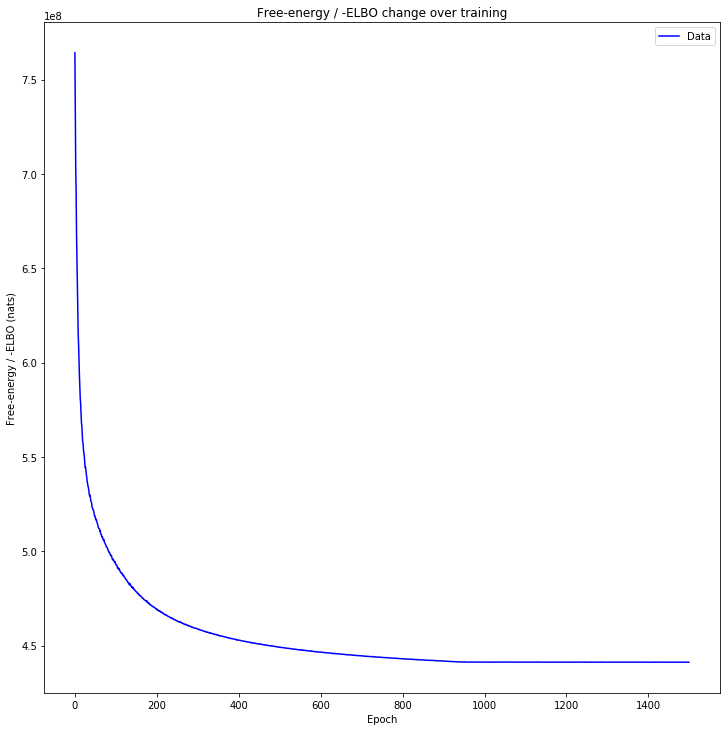

In [8]:
utils.plot_losses(losses)

In [9]:
losses = htfa.train(num_steps=500, learning_rate=1e-2, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=50, blocks_batch_size=12,
                    blocks_filter=lepping_db.inference_filter(training=False))

01/30/2020 23:19:06 [Epoch 1] (1830ms) Posterior free-energy 1.44104320e+08
01/30/2020 23:19:06 Saving checkpoint...
01/30/2020 23:19:07 [Epoch 2] (1806ms) Posterior free-energy 1.42629568e+08
01/30/2020 23:19:09 [Epoch 3] (1847ms) Posterior free-energy 1.44016800e+08
01/30/2020 23:19:11 [Epoch 4] (1837ms) Posterior free-energy 1.39600048e+08
01/30/2020 23:19:13 [Epoch 5] (1808ms) Posterior free-energy 1.35068688e+08
01/30/2020 23:19:15 [Epoch 6] (1785ms) Posterior free-energy 1.34744592e+08
01/30/2020 23:19:17 [Epoch 7] (1815ms) Posterior free-energy 1.32005992e+08
01/30/2020 23:19:18 [Epoch 8] (1841ms) Posterior free-energy 1.28850048e+08
01/30/2020 23:19:20 [Epoch 9] (1859ms) Posterior free-energy 1.27613384e+08
01/30/2020 23:19:22 [Epoch 10] (1810ms) Posterior free-energy 1.27553768e+08
01/30/2020 23:19:24 [Epoch 11] (1810ms) Posterior free-energy 1.25058304e+08
01/30/2020 23:19:26 [Epoch 12] (1830ms) Posterior free-energy 1.23072032e+08
01/30/2020 23:19:27 [Epoch 13] (1793ms) Post

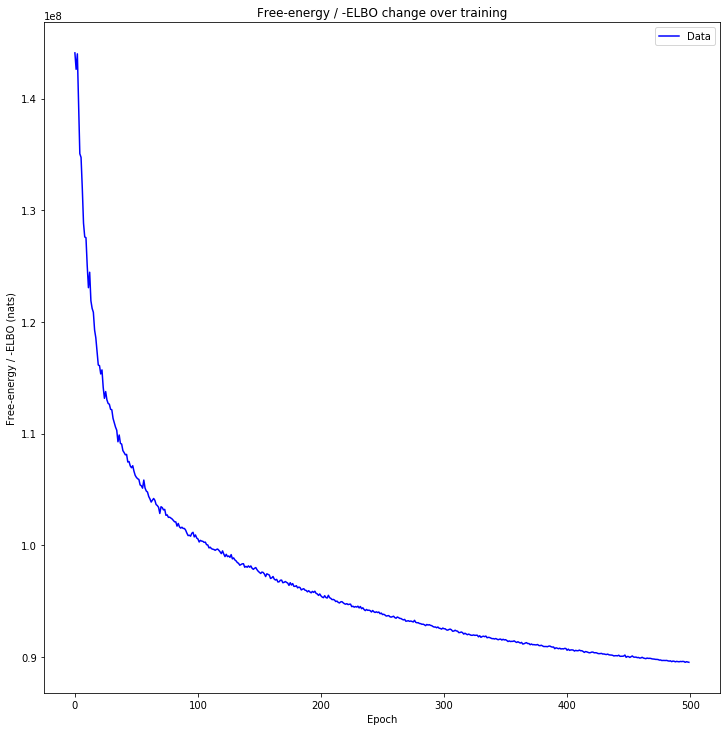

In [10]:
utils.plot_losses(losses)

In [11]:
import re

In [12]:
def subject_labeler(subject):
    subject_regex = re.compile("([A-Za-z]+)([0-9]{1,2})")
    m = subject_regex.search(subject)
    condition, sub_num = m.groups()
    if condition == 'mdd':
        condition = 'Major Depressive'
    elif condition == 'control':
        condition = 'Control'
    return '%s Participant %d' % (condition, int(sub_num))

In [13]:
def task_labeler(task):
    if task == 'negative_music':
        task = 'Negative music'
    elif task == 'positive_music':
        task = 'Positive music'
    else:
        task = task.capitalize()
    return task

In [14]:
def lepping_2017_labeler(block):
    subject = subject_labeler(block.subject)
    task = task_labeler(block.task)
    return subject + ', ' + task + ' stimulus'

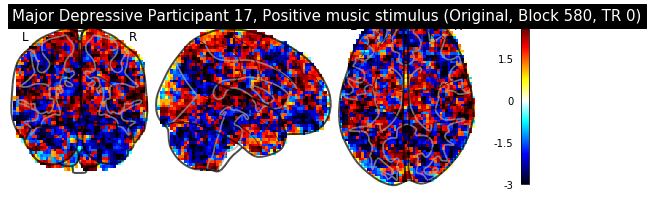

01/30/2020 23:34:08 Reconstruction Error (Frobenius Norm): 8.21062256e+02 out of 8.21105042e+02


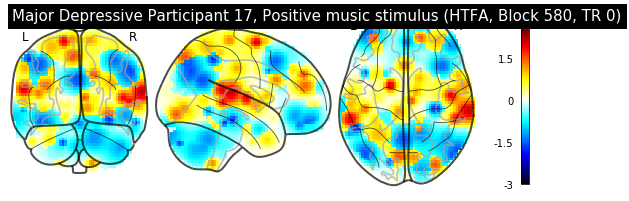

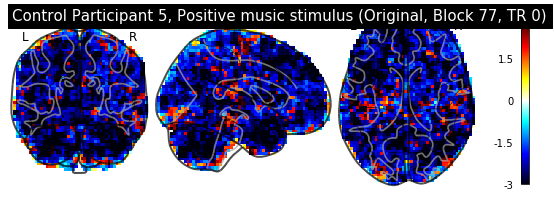

01/30/2020 23:34:11 Reconstruction Error (Frobenius Norm): 9.06035217e+02 out of 9.58796326e+02


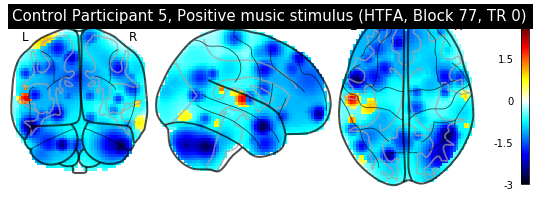

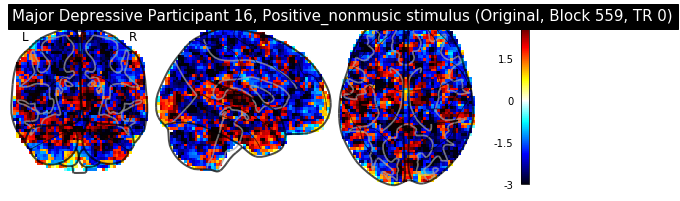

01/30/2020 23:34:14 Reconstruction Error (Frobenius Norm): 8.83139587e+02 out of 8.54296875e+02


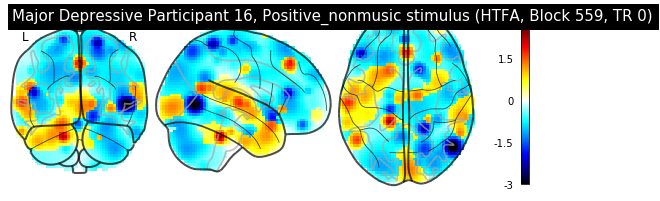

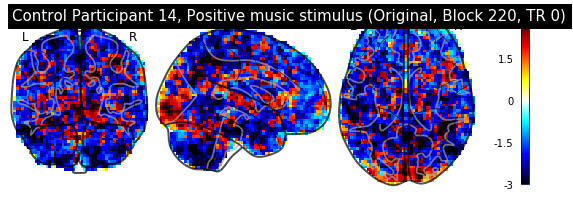

01/30/2020 23:34:17 Reconstruction Error (Frobenius Norm): 8.57569946e+02 out of 8.06919617e+02


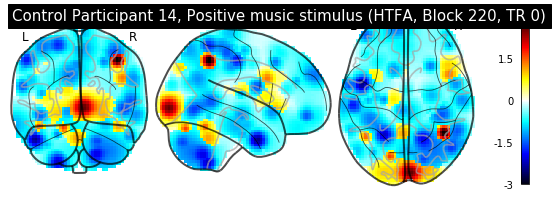

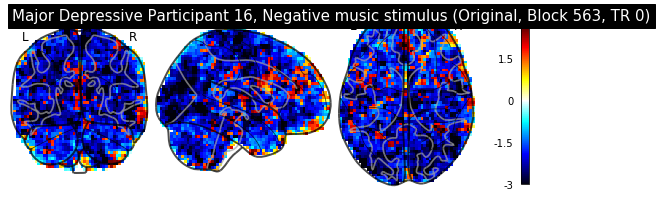

01/30/2020 23:34:19 Reconstruction Error (Frobenius Norm): 7.97428894e+02 out of 8.12691895e+02


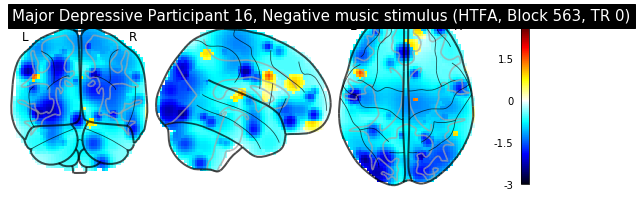

In [15]:
for b in np.random.choice(range(htfa.num_blocks), 5):
    htfa.plot_original_brain(b, labeler=lepping_2017_labeler)
    htfa.plot_reconstruction(b, labeler=lepping_2017_labeler)

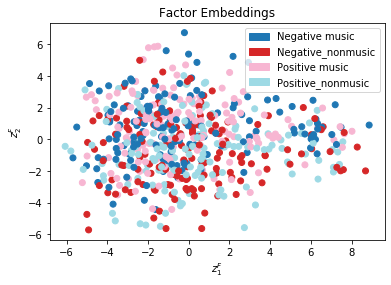

In [16]:
#factor 'embeddings' with PCA
htfa.scatter_factor_embedding(labeler=lambda block: task_labeler(block.task), embedding='PCA')

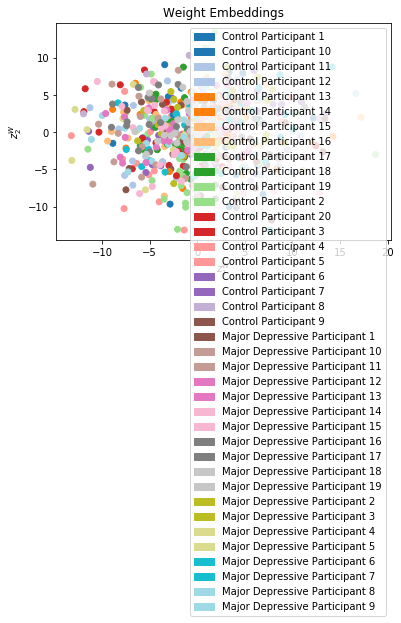

In [17]:
#weight 'embeddings' with PCA
htfa.scatter_weight_embedding(labeler=lambda block: subject_labeler(block.subject), embedding='PCA')

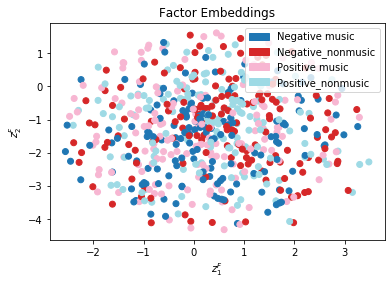

In [18]:
#factor 'embeddings' with TSNE
htfa.scatter_factor_embedding(labeler=lambda block: task_labeler(block.task), embedding='TSNE')

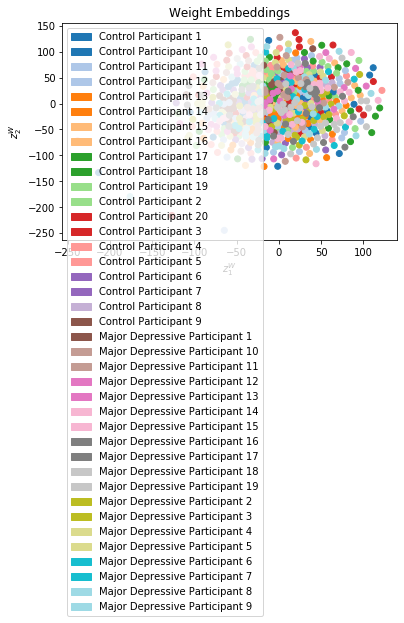

In [19]:
#weight 'embeddings' with TSNE
htfa.scatter_weight_embedding(labeler=lambda block: subject_labeler(block.subject), embedding='TSNE')

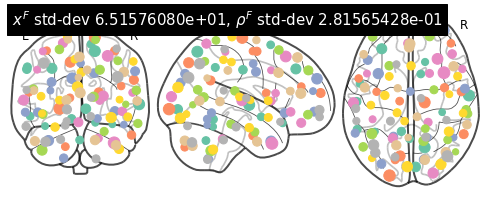

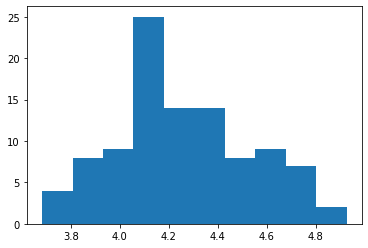

(<nilearn.plotting.displays.OrthoProjector at 0x7fc7459fef90>,
 tensor([[ 1.5422e+01, -6.5956e+01,  5.7257e+01],
         [ 1.5881e+01,  2.3832e+01, -1.7938e+01],
         [-9.0658e+00, -4.9208e+01, -1.3854e+01],
         [ 1.1370e+01,  1.1217e+01,  6.4499e+01],
         [-5.6126e+01, -1.7941e+01,  3.8263e+01],
         [ 6.1990e+01, -1.1386e+01,  1.3409e+00],
         [-5.2604e+01,  1.2155e+00, -1.1183e+01],
         [ 5.9856e+00, -8.6579e+01, -3.4261e+00],
         [-5.5553e+01, -4.7047e+01,  4.0676e+01],
         [-3.6912e+01, -4.9330e+01, -2.1597e+01],
         [-2.9706e+01,  3.7745e+01,  3.9126e+01],
         [ 3.3841e+01, -2.9033e+01, -1.9769e+01],
         [-5.5300e-01, -5.6899e+01, -3.6226e+01],
         [ 4.3095e+01,  4.3461e+01,  2.0563e+01],
         [-1.0433e+01, -7.5015e+01,  4.5627e+01],
         [ 5.6511e+01, -5.2081e+01,  2.6989e+01],
         [ 5.4042e+01, -7.3944e+00, -3.1012e+01],
         [-1.0854e+01, -1.7374e+01,  8.0796e+00],
         [-3.5174e+01, -7.5255e+00,  

In [20]:
htfa.visualize_factor_template()

In [21]:
htfa.average_reconstruction_error(weighted=False, blocks_filter=lepping_db.inference_filter(training=True))

01/30/2020 23:34:57 Average reconstruction error (MSE): 7.01524318e+02 +/- 4.62087859e+01
01/30/2020 23:34:57 Average data norm (Euclidean): 8.28917953e+02 +/- 5.39972860e+01
01/30/2020 23:34:57 Percent average reconstruction error: 84.757487 +/- 4.73354575e+00


(array([732.50518799, 717.04425049, 654.08996582, 731.9989624 ,
        682.63879395, 694.82562256, 729.06158447, 702.059021  ,
        634.27978516, 632.09564209, 644.17480469, 633.0211792 ,
        673.96179199, 724.06738281, 692.93817139, 683.60705566,
        658.51629639, 689.16644287, 670.56445312, 684.70141602,
        730.21044922, 736.54681396, 748.20166016, 738.08013916,
        706.22509766, 728.03240967, 716.69036865, 704.27764893,
        685.95751953, 754.72723389, 711.63867188, 734.81011963,
        672.20428467, 691.60491943, 684.43261719, 674.82189941,
        640.86572266, 643.16107178, 645.9151001 , 601.28259277,
        718.16162109, 714.12243652, 716.89013672, 733.64526367,
        727.02728271, 723.75274658, 730.95611572, 709.3359375 ,
        741.39904785, 754.73132324, 760.94158936, 772.4354248 ,
        746.9541626 , 752.61077881, 743.45166016, 724.76977539,
        782.44610596, 779.40960693, 764.38537598, 718.29840088,
        740.28491211, 735.49951172, 711.

In [22]:
htfa.free_energy(batch_size=50, use_cuda=True, blocks_batch_size=15, num_particles=1, sample_size=100,
                 blocks_filter=lepping_db.inference_filter(training=True))

[[446614368.0, -438231680.0, 8382649.0],
 [446711424.0, -438140928.0, 8384841.5]]

In [23]:
htfa.free_energy(batch_size=50, use_cuda=True, blocks_batch_size=15, num_particles=1, sample_size=100,
                 blocks_filter=lepping_db.inference_filter(training=False))

[[90419592.0, -89093752.0, 1325819.875],
 [90521992.0, -89024568.0, 1327115.375]]